In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [28]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
features=df.drop('Type',axis=1)
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
target=df[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [6]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(133, 13)
(133, 1)
(45, 13)
(45, 1)


In [8]:
pca=PCA(n_components=0.90)

In [9]:
pca.fit(x_train)
pca.fit(y_train)

PCA(n_components=0.9)

In [10]:
log_model=LogisticRegression()

In [11]:
log_model.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred=log_model.predict(x_test)
y_pred

array([2, 3, 1, 1, 3, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3,
       1], dtype=int64)

In [13]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [14]:
pca.explained_variance_ratio_

array([1.])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.94      0.88      0.91        17
           3       1.00      0.94      0.97        18

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [31]:
standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(df)
std_wine.shape

(178, 14)

In [32]:
minmax = MinMaxScaler()
norm_wine = minmax.fit_transform(df)
norm_wine.shape

(178, 14)

In [33]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)

# Convert to data frame
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


In [34]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

In [35]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_wine)
    sil_score1 = sil(pca_std_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4204121880714806


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4881750664935787


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4373730550531827


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3744959543005819


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.38012780261618345


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.3313619767260982


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.29709396480883526


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.29563826868336657


In [36]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(178,)

In [37]:
y_predict_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [38]:
model_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [39]:
model_kmeans.cluster_centers_

array([[-2.54885890e+00, -9.36610484e-01,  1.63163246e-03],
       [ 1.21711421e-01,  1.75036892e+00,  1.28333665e-01],
       [ 3.05866503e+00, -1.20826261e+00, -1.77541159e-01]])

In [40]:
model_kmeans.inertia_

491.2305709162671

In [42]:
df['Kmeans_Label'] = model_kmeans.labels_

In [43]:
df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [47]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


In [49]:
pca = PCA(n_components=3)
pca_norm = pca.fit_transform(norm_wine)
pca_norm_wine = pd.DataFrame(data = pca_norm, columns = ['PC1', 'PC2','PC3'])
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092


In [50]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_norm_wine)
    sil_score1= sil(pca_norm_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4964482877288064


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5742903318722891


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.48561835974400647


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.46953563378640967


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3704455035591312


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.3180044216560208


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.299769232627445


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.3112885463091425


In [51]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_norm_wine)
y_predict_kmeans.shape

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(178,)

In [52]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [53]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [54]:
model_kmeans.cluster_centers_

array([[ 7.94800855e-01, -2.39602856e-01,  6.92839230e-04],
       [ 2.07947321e-02,  3.49009117e-01,  4.45609801e-03],
       [-6.73001307e-01, -2.05684819e-01, -5.69033142e-03]])

In [55]:
model_kmeans.inertia_

16.734135217329108

In [56]:
df['Kmeans_Label'] = model_kmeans.labels_

In [58]:
df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


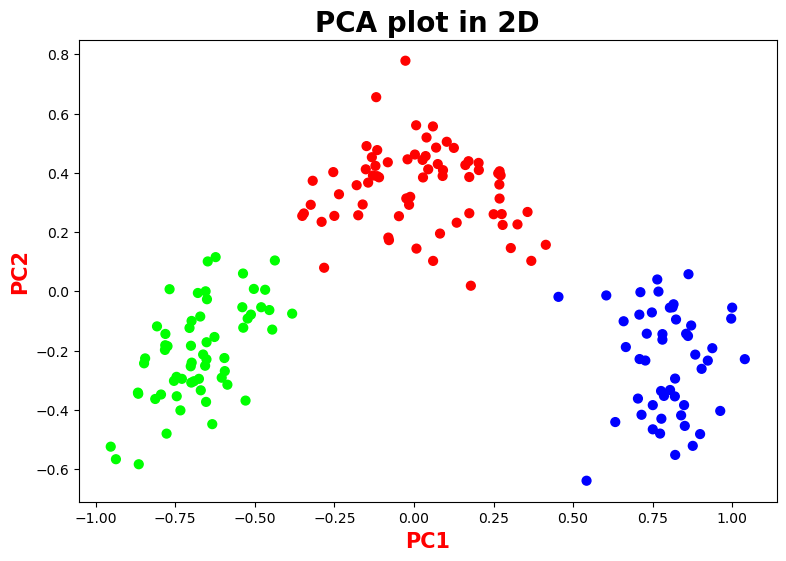

In [95]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= df['Kmeans_Label'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=20)
plt.xlabel('PC1', fontweight='bold', fontsize=15,color='red')
plt.ylabel('PC2', fontweight='bold', fontsize=15,color='red')
plt.show()

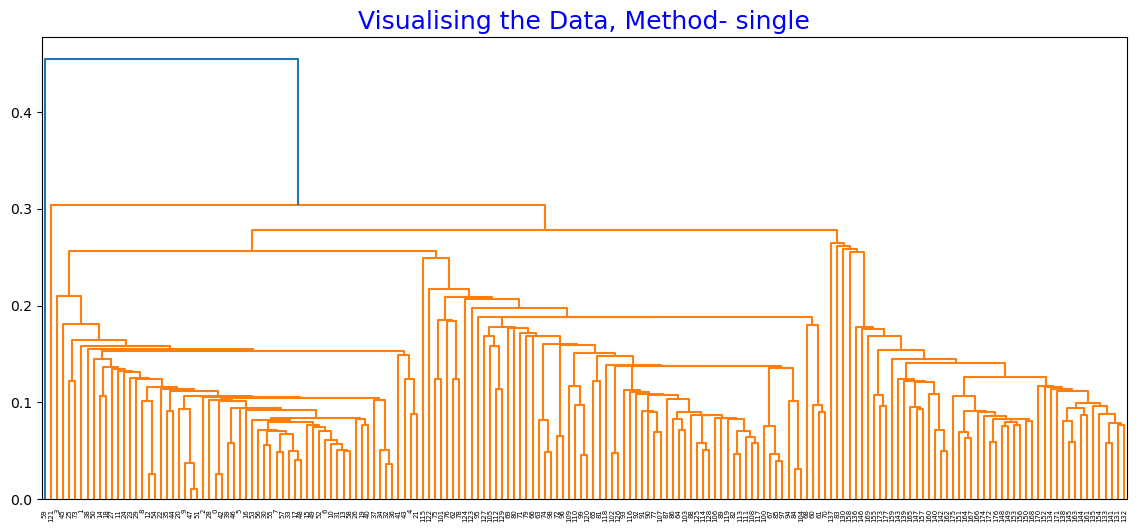

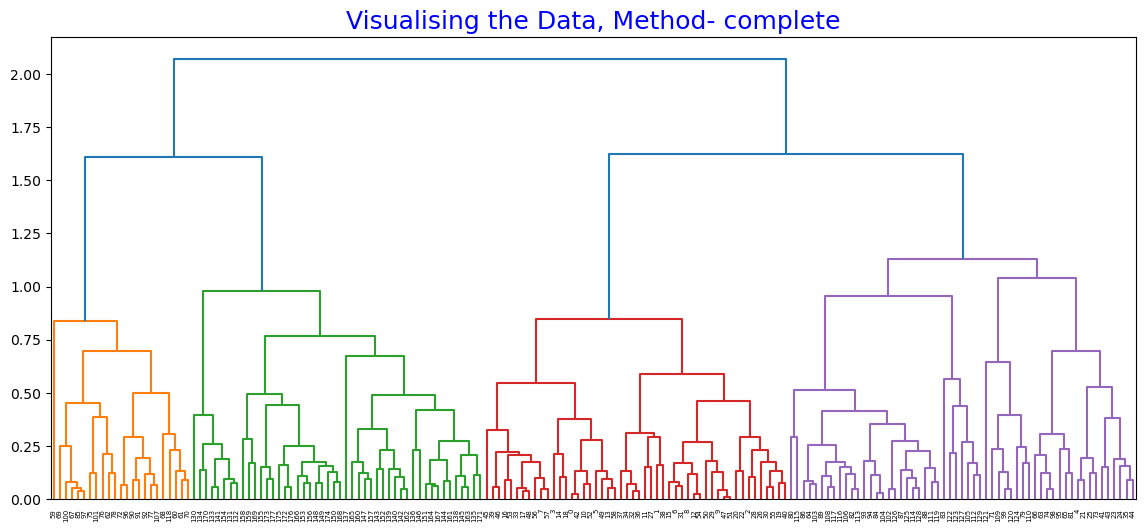

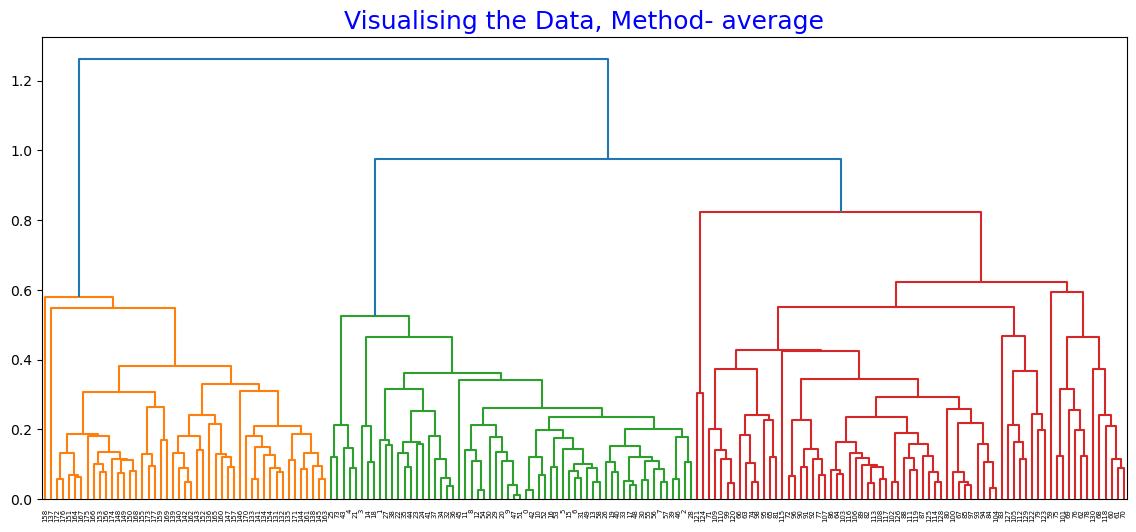

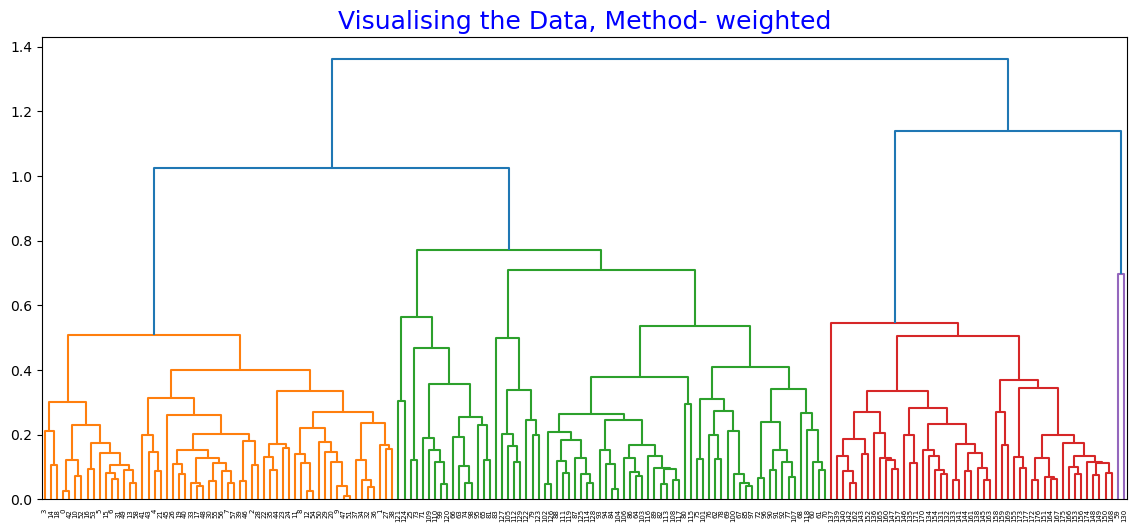

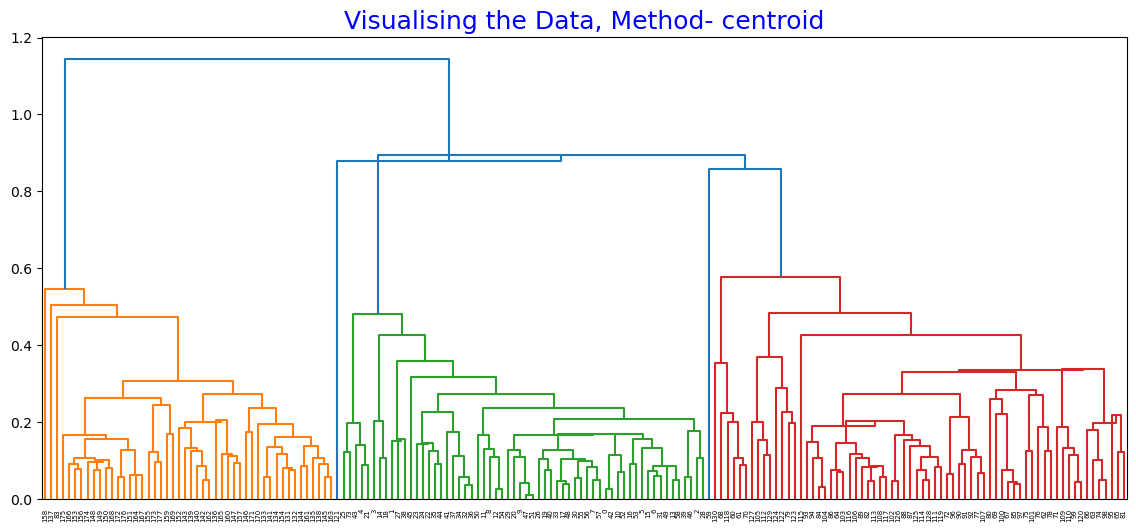

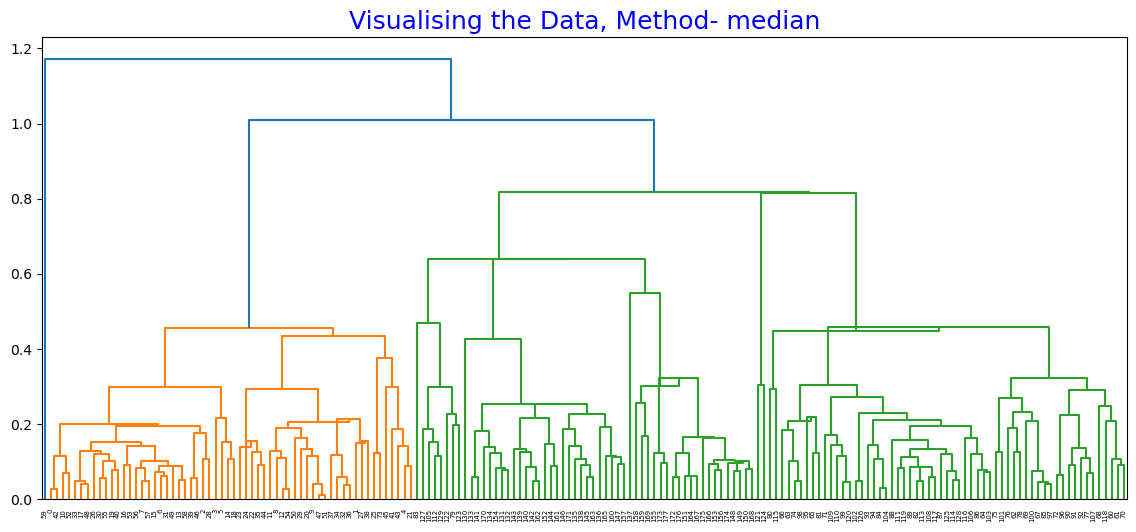

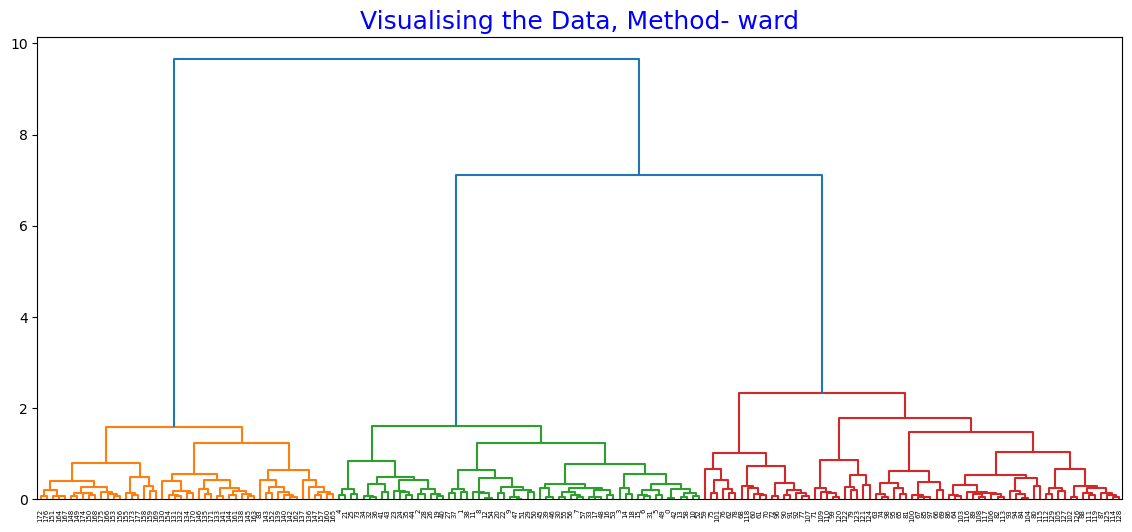

In [65]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6)) 
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))

In [66]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1 = sil(pca_norm_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5028007154238558
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- single : 0.1956897297434469

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5742903318722891
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.40905822282646803
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5673677512398139
For n_clusters = 3 The average silhouette_score with linkage- single : 0.06455702366101262

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4799467565432544
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.42050509534084823
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5202861583932612
Fo

In [67]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1 = sil(pca_std_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42991444934276213
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.32862502168367774
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3427938744119083
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3427938744119083

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.47882407301804497
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.299710605380154
For n_clusters = 3 The average silhouette_score with linkage- average : 0.41176259538403825
For n_clusters = 3 The average silhouette_score with linkage- single : 0.19025260881091388

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4141976238570733
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4225190812930178
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3274648531010523
F

In [68]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 2, 3, 0, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 3, 0, 3, 3, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [69]:
agg_clustering.n_clusters_

4

In [71]:
df['Hierarchical_Labels'] = agg_clustering.labels_
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


In [74]:
df.groupby('Hierarchical_Labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,1.951220,12.218049,2.141220,2.452439,22.095122,94.926829,2.457561,2.372195,0.367073,1.753902,3.066585,1.048049,2.934634,522.731707,1.073171
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,0.000000
2,1.050000,13.694333,1.961500,2.411500,16.830000,108.016667,2.806500,2.933167,0.284333,1.947667,5.452000,1.066500,3.136500,1111.116667,1.950000
3,2.034483,12.411724,1.650345,2.035172,17.996552,91.413793,2.022759,1.727931,0.359310,1.322759,3.164483,1.055724,2.580690,507.862069,0.965517


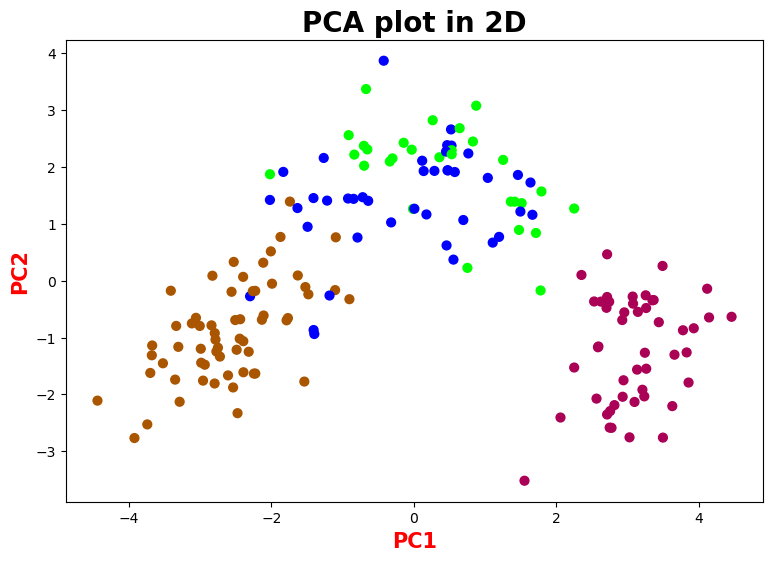

In [92]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D',fontweight='bold', fontsize=20)
plt.xlabel('PC1', fontweight='bold', fontsize=15,color='red')
plt.ylabel('PC2', fontweight='bold', fontsize=15,color='red')
plt.show()

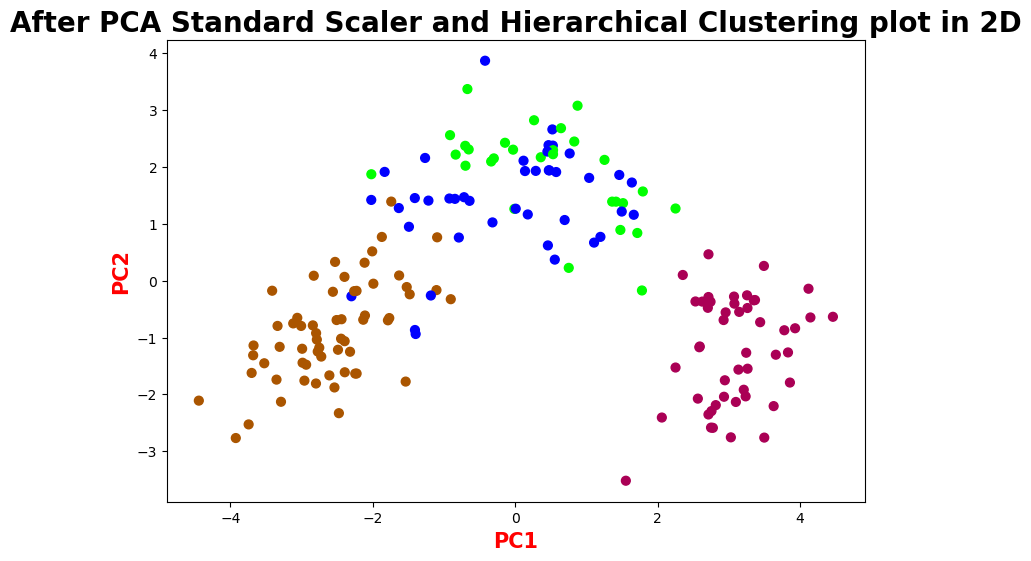

In [93]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D', fontweight='bold', fontsize=20)
plt.xlabel('PC1',fontweight='bold', fontsize=15,color='red')
plt.ylabel('PC2',fontweight='bold', fontsize=15,color='red')
plt.show()

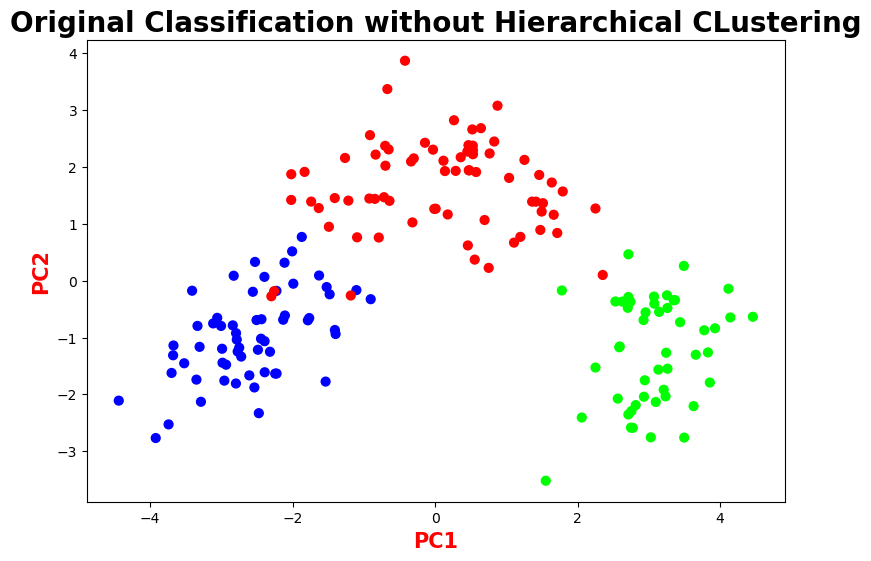

In [94]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= df['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=20)
plt.xlabel('PC1',fontweight='bold', fontsize=15,color='red')
plt.ylabel('PC2',fontweight='bold', fontsize=15,color='red')
plt.show()